In [1]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

In [2]:
import requests
import csv

def get_minute_data(symbol):        
    url = "https://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q={}".format(symbol)
    page = requests.get(url)
    reader = csv.reader(page.content.decode('utf-8').splitlines())
    return symbol, list(reader) 
_, data = get_minute_data("AAPL")
data

[['EXCHANGE%3DNASDAQ'],
 ['MARKET_OPEN_MINUTE=570'],
 ['MARKET_CLOSE_MINUTE=960'],
 ['INTERVAL=60'],
 ['COLUMNS=DATE', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME'],
 ['DATA='],
 ['TIMEZONE_OFFSET=-240'],
 ['a1524576600', '165.85', '166', '165.66', '165.67', '354293'],
 ['1', '166.02', '166.11', '165.75', '165.82', '170153'],
 ['2', '165.98', '166.04', '165.8', '166.03', '207662'],
 ['3', '166', '166.04', '165.89', '166', '150623'],
 ['4', '165.822', '166.03', '165.74', '166', '111002'],
 ['5', '165.68', '165.885', '165.54', '165.81', '122425'],
 ['6', '165.71', '165.8', '165.62', '165.671', '93492'],
 ['7', '165.96', '165.98', '165.69', '165.72', '114038'],
 ['8', '166.013', '166.05', '165.86', '165.9601', '250362'],
 ['9', '165.975', '166.025', '165.925', '166.02', '82033'],
 ['10', '165.91', '166.03', '165.83', '165.975', '113859'],
 ['11', '165.8848', '165.9195', '165.77', '165.9195', '100133'],
 ['12', '166.14', '166.14', '165.841', '165.89', '101595'],
 ['13', '166.12', '166.17', '16

In [3]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np

DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')

def minute_data_to_df(data):
    base_timestamp = 0
    t, c, h, l, o, v = [[] for i in range(6)]
    for i, row in enumerate(data):
        if len(row) == 6:
            timestamp, close, high, low, open, volume = row
            if timestamp.startswith("a"):
                base_timestamp = int(timestamp[1:])                
            elif timestamp.isnumeric(): 
                delta = timedelta(seconds=60 * (int(timestamp) - 1))
                dt = datetime.fromtimestamp(base_timestamp, tz=DATA_TIMEZONE) + delta
                t.append(dt.astimezone(LOCAL_TZ))
                c.append(float(close))
                h.append(float(high))
                l.append(float(low))
                o.append(float(open))
                v.append(int(volume))
                
    df = pd.DataFrame(dict(time=t, close=c, high=h, low=l, open=o, volume=v))
    return df                
    
dd = minute_data_to_df(data)
dd

,close,high,low,open,time,volume
0,166.0200,166.1100,165.7500,165.8200,2018-04-24 06:30:00-07:00,170153
1,165.9800,166.0400,165.8000,166.0300,2018-04-24 06:31:00-07:00,207662
2,166.0000,166.0400,165.8900,166.0000,2018-04-24 06:32:00-07:00,150623
3,165.8220,166.0300,165.7400,166.0000,2018-04-24 06:33:00-07:00,111002
4,165.6800,165.8850,165.5400,165.8100,2018-04-24 06:34:00-07:00,122425
5,165.7100,165.8000,165.6200,165.6710,2018-04-24 06:35:00-07:00,93492
6,165.9600,165.9800,165.6900,165.7200,2018-04-24 06:36:00-07:00,114038
7,166.0130,166.0500,165.8600,165.9601,2018-04-24 06:37:00-07:00,250362
8,165.9750,166.0250,165.9250,166.0200,2018-04-24 06:38:00-07:00,82033
9,165.9100,166.0300,165.8300,165.9750,2018-04-24 06:39:00-07:00,113859


In [4]:
last_date = dd.time.max().date()
print(last_date)
avg9days = dd[dd.time.dt.date != last_date].volume.mean()
print(avg9days)
dd = dd[dd.time.dt.date == last_date].copy()
dd_len = len(dd)
dd['current_score'] = dd.volume / avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

2018-05-07
88992.89373219373


,close,high,low,open,time,volume,current_score,rolling_score
3510,185.7300,185.8800,185.1569,185.1900,2018-05-07 06:30:00-07:00,627392,7.049911,7.049911
3511,185.9634,186.1000,185.5400,185.7356,2018-05-07 06:31:00-07:00,569280,6.396915,6.723413
3512,186.0300,186.3500,185.9500,185.9650,2018-05-07 06:32:00-07:00,396955,4.460525,5.969117
3513,186.4400,186.5400,186.0100,186.0500,2018-05-07 06:33:00-07:00,315267,3.542609,5.362490
3514,186.4375,186.5200,186.3100,186.4400,2018-05-07 06:34:00-07:00,341524,3.837655,5.057523
3515,186.5600,186.6600,186.3100,186.4375,2018-05-07 06:35:00-07:00,287112,3.226235,4.752308
3516,186.6200,186.7700,186.5000,186.5600,2018-05-07 06:36:00-07:00,278787,3.132688,4.520934
3517,186.4500,186.6299,186.3100,186.6299,2018-05-07 06:37:00-07:00,275070,3.090921,4.342182
3518,186.2400,186.4300,186.1100,186.4300,2018-05-07 06:38:00-07:00,296664,3.333570,4.230114
3519,186.4300,186.4300,186.1200,186.2461,2018-05-07 06:39:00-07:00,217060,2.439071,4.051010


In [5]:
import threading
import queue


def get_data_parallel(symbols):    
    max_threads = 300
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_minute_data(*args)
            if response:
                result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock,))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    while True:
        try:
            symbol, result = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            data = minute_data_to_df(result)
            if len(data):
                last_date = data.time.max().date()

                prev_days_data = data[data.time.dt.date != last_date]
                prev_data_len = len(prev_days_data)
                prev_close = prev_days_data.iloc[prev_data_len - 1].close
                avg9days = prev_days_data.volume.mean()

                data = data[data.time.dt.date == last_date].copy()
                data['symbol'] = symbol
                data['avg9days'] = avg9days
                data['current_score'] = data.volume / avg9days
                dd_len = len(data)
                data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()

                if df is None:
                    df = data
                else:
                    df = df.append(data, ignore_index=True)             
            
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
all_dd = get_data_parallel(get_stocks()[:10])
all_dd

,close,high,low,open,time,volume,symbol,avg9days,current_score,rolling_score
0,34.4000,34.5500,34.3500,34.3500,2018-05-07 06:32:00-07:00,1800,PCRX,2218.503521,0.811358,0.811358
1,34.3000,34.4500,34.2500,34.4000,2018-05-07 06:33:00-07:00,900,PCRX,2218.503521,0.405679,0.608518
2,34.3000,34.3000,34.1500,34.1500,2018-05-07 06:35:00-07:00,500,PCRX,2218.503521,0.225377,0.480805
3,34.3998,34.3998,34.3000,34.3000,2018-05-07 06:36:00-07:00,700,PCRX,2218.503521,0.315528,0.439485
4,34.6000,34.6000,34.4500,34.4500,2018-05-07 06:37:00-07:00,500,PCRX,2218.503521,0.225377,0.396664
5,34.4498,34.4498,34.4498,34.4498,2018-05-07 06:38:00-07:00,200,PCRX,2218.503521,0.090151,0.345578
6,34.5500,34.5500,34.5500,34.5500,2018-05-07 06:39:00-07:00,200,PCRX,2218.503521,0.090151,0.309089
7,34.5500,34.5500,34.5500,34.5500,2018-05-07 06:41:00-07:00,100,PCRX,2218.503521,0.045075,0.276087
8,34.5750,34.6000,34.5000,34.6000,2018-05-07 06:42:00-07:00,610,PCRX,2218.503521,0.274960,0.275962
9,34.6000,34.6000,34.6000,34.6000,2018-05-07 06:43:00-07:00,100,PCRX,2218.503521,0.045075,0.252873


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


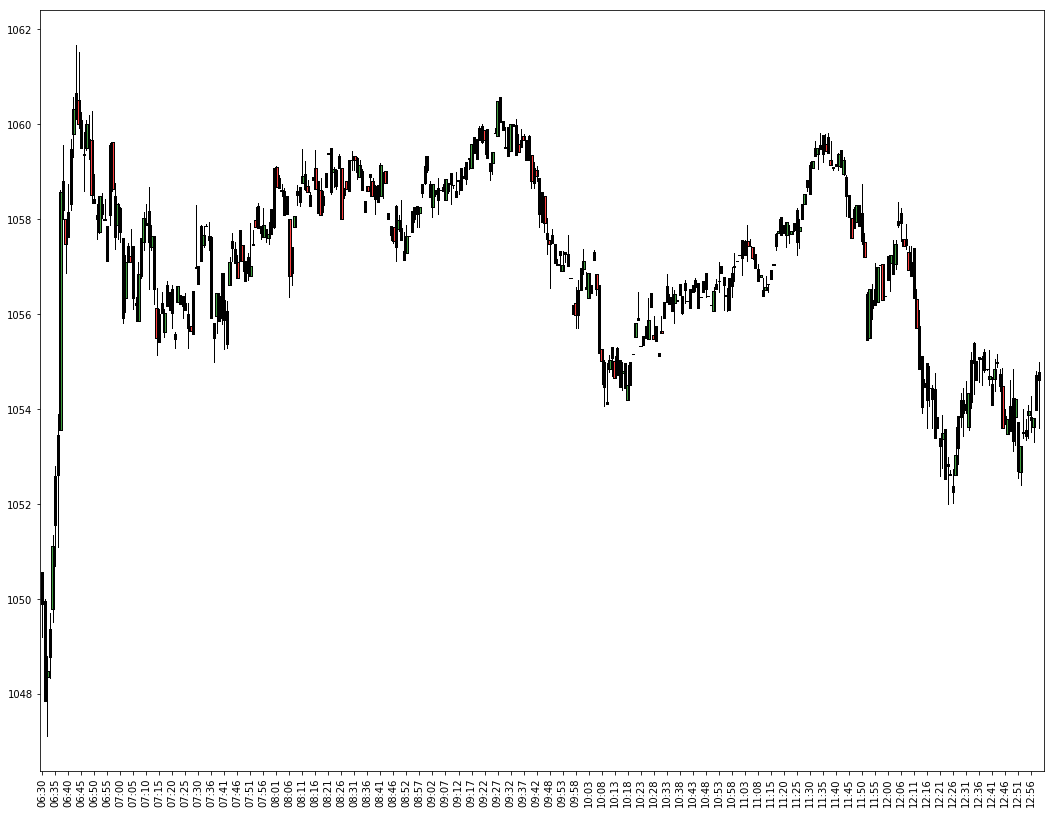

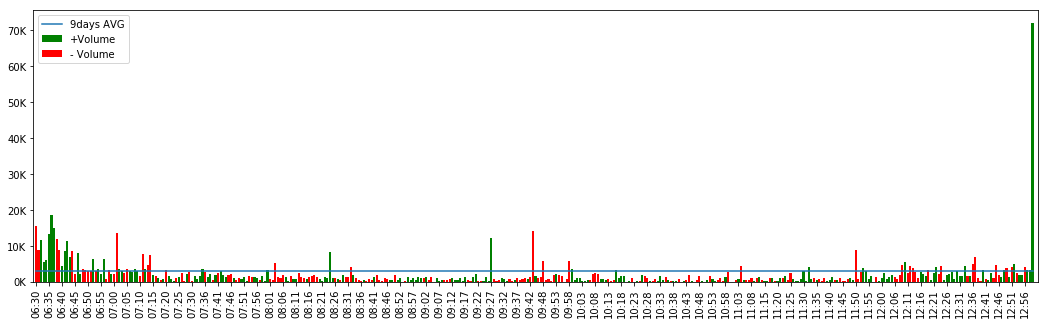

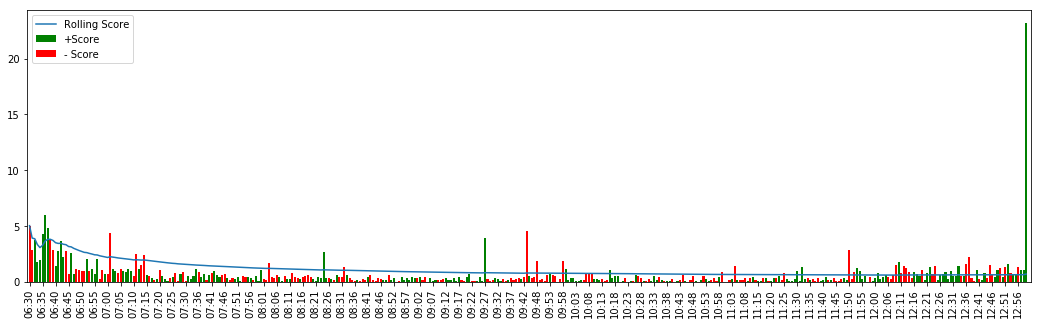

In [6]:
%matplotlib inline

from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker


def display_charts(df):
    if not len(df):
        print("No data")
        return
    
    df = df.reset_index()
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.loc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    plt.show()

display_charts(all_dd[all_dd.symbol == "GOOG"])

1. WTW 12:59PM: Rolling Score 2.0002240363687593, Current Score 13.484607227255813


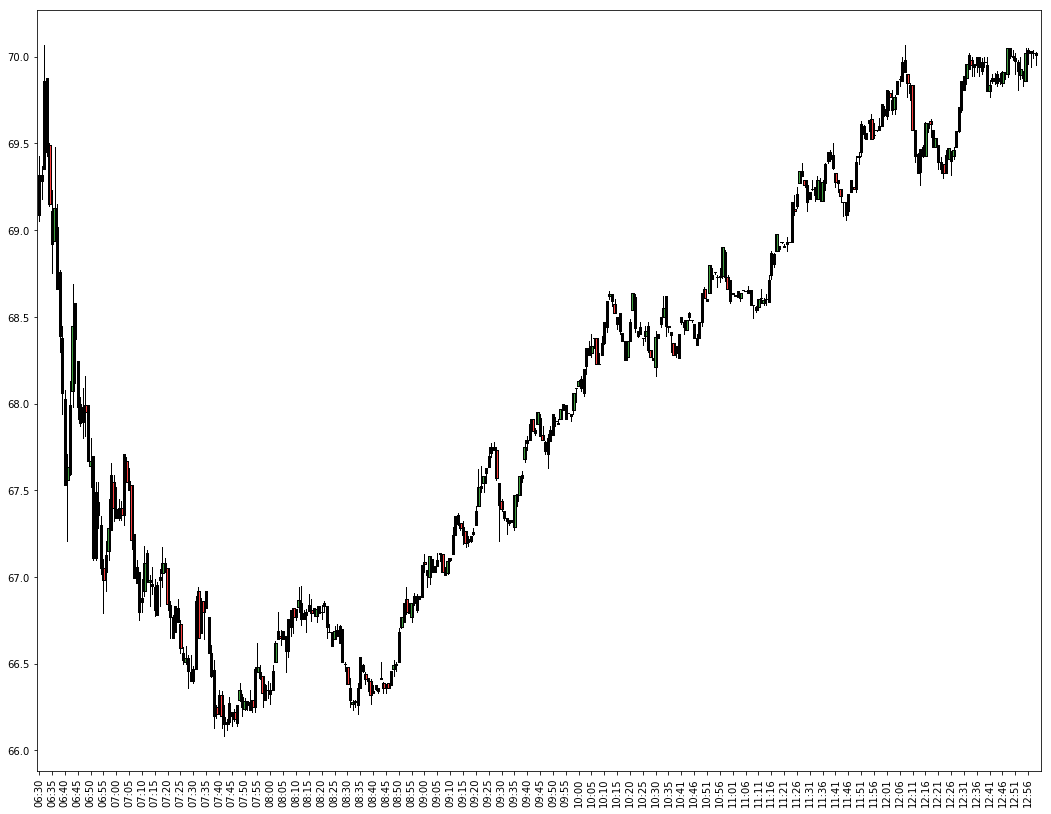

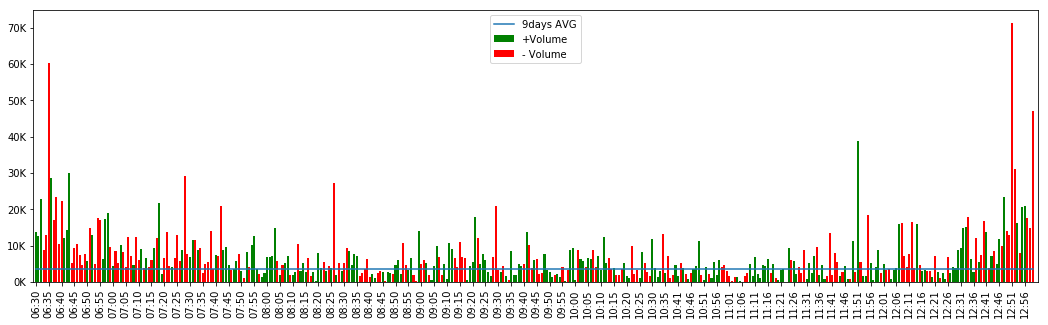

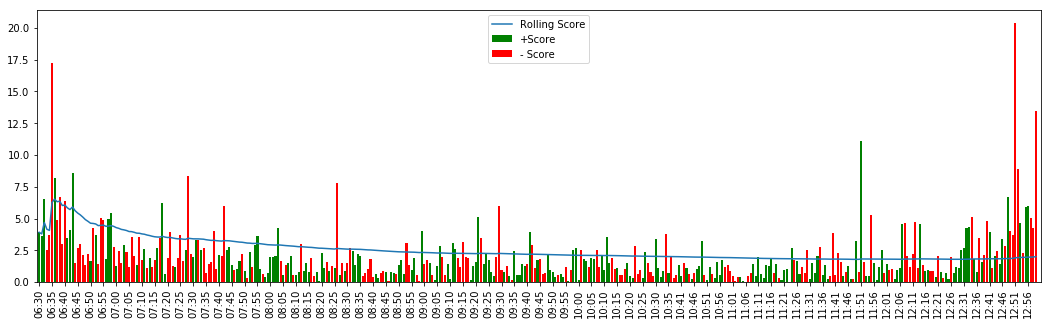

2. CRM 12:59PM: Rolling Score 1.097990466631434, Current Score 8.630135763799997


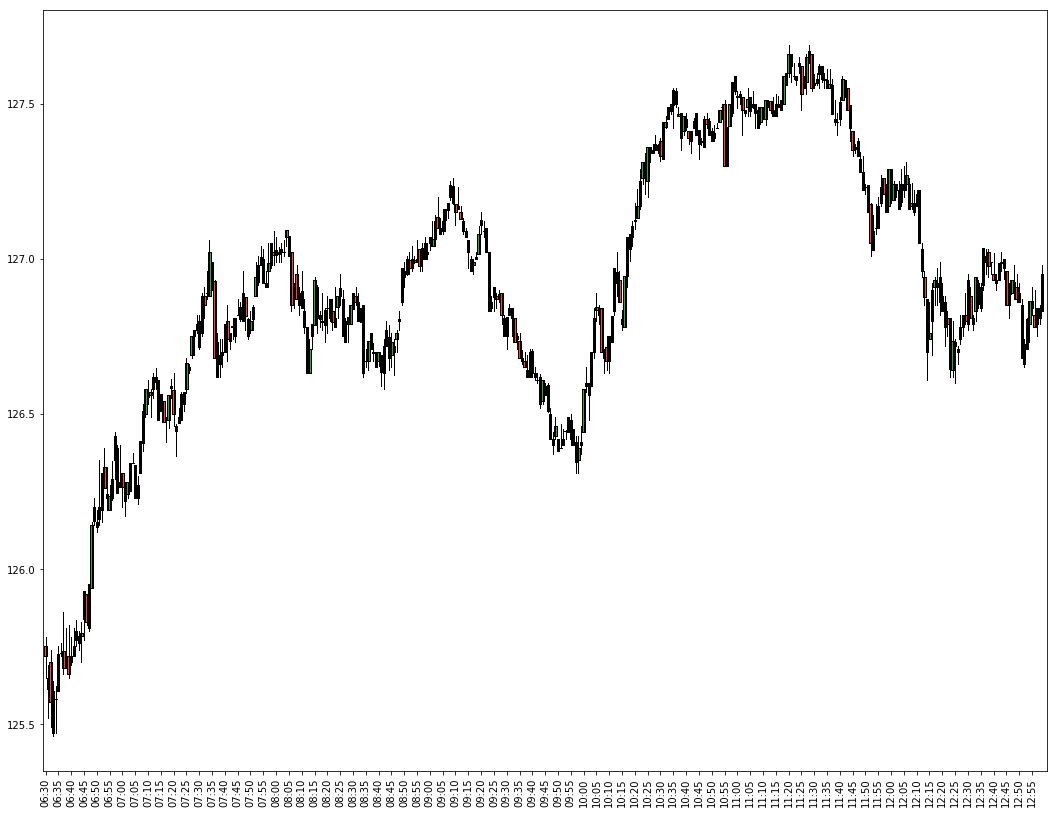

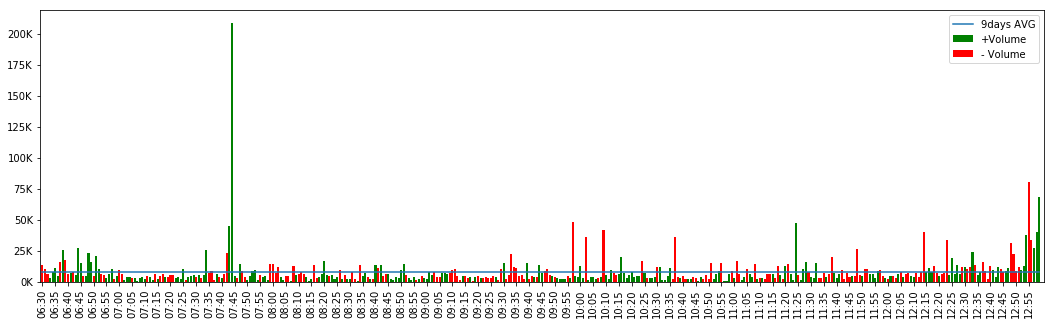

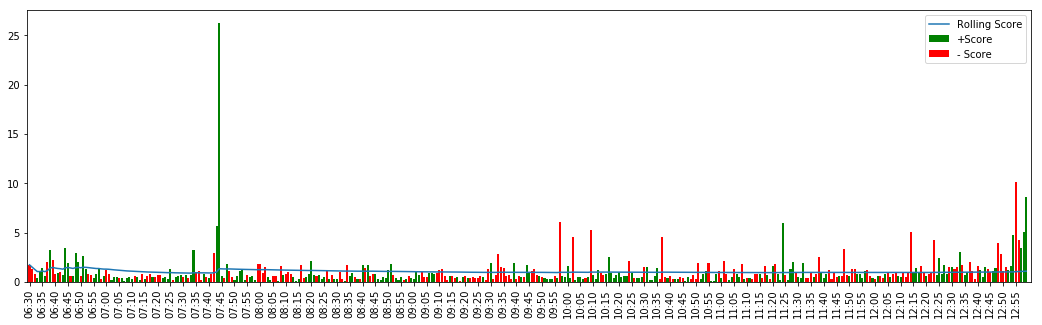

3. AAPL 12:59PM: Rolling Score 1.0540523551582786, Current Score 16.42845780922288


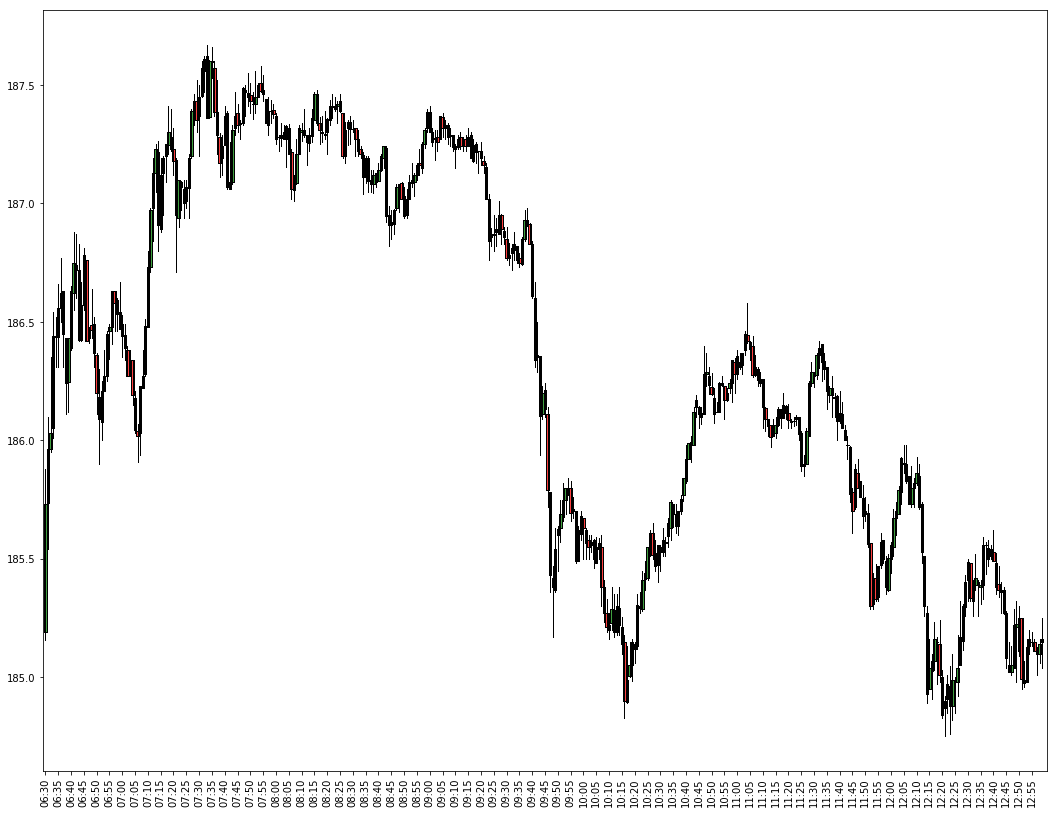

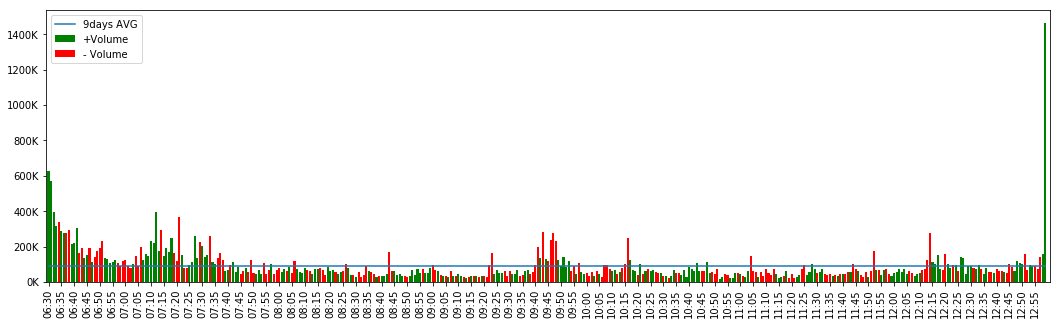

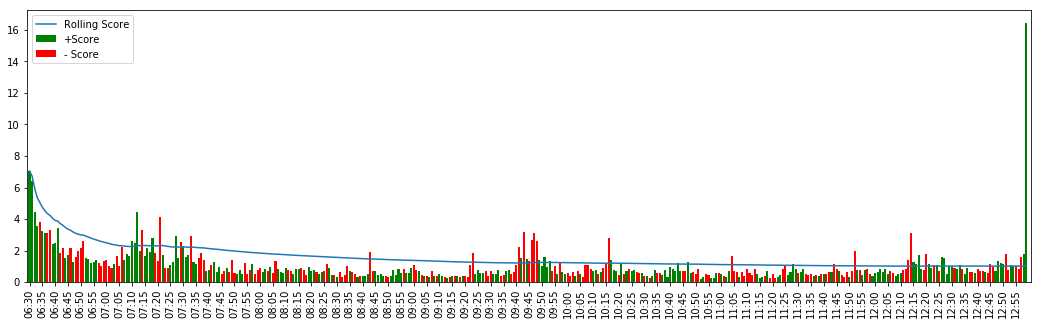

4. LOW 12:59PM: Rolling Score 0.7697600200914454, Current Score 5.5955984316011405


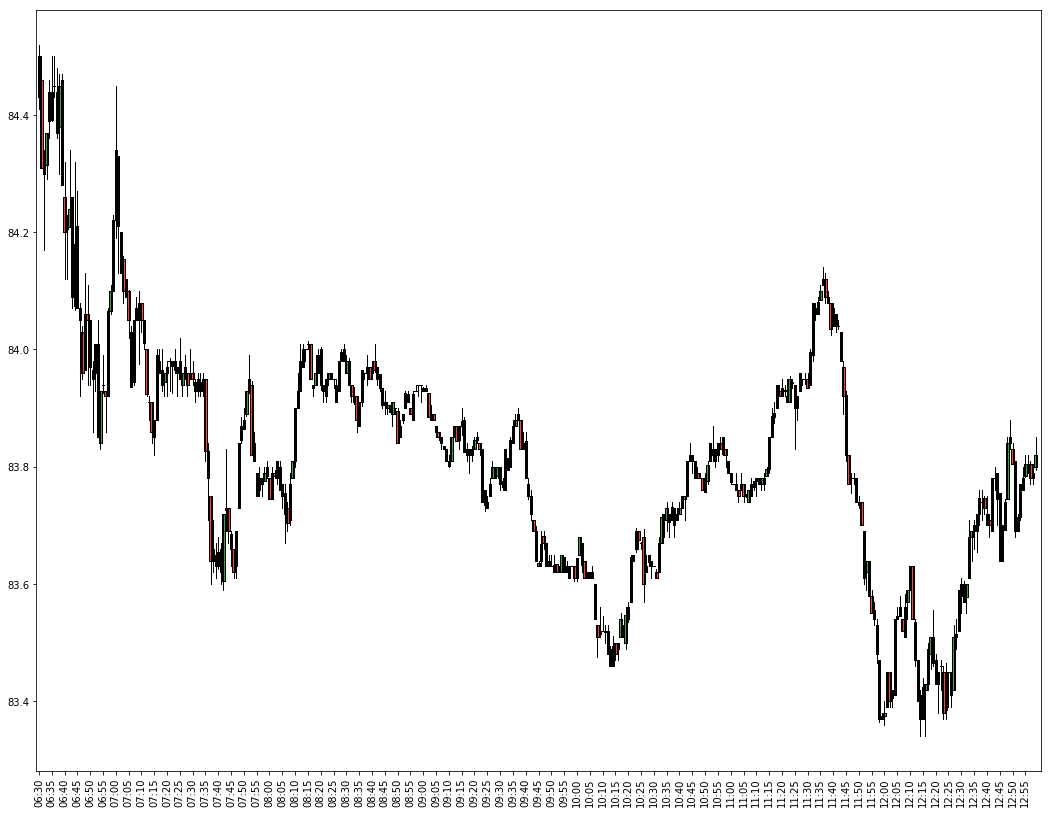

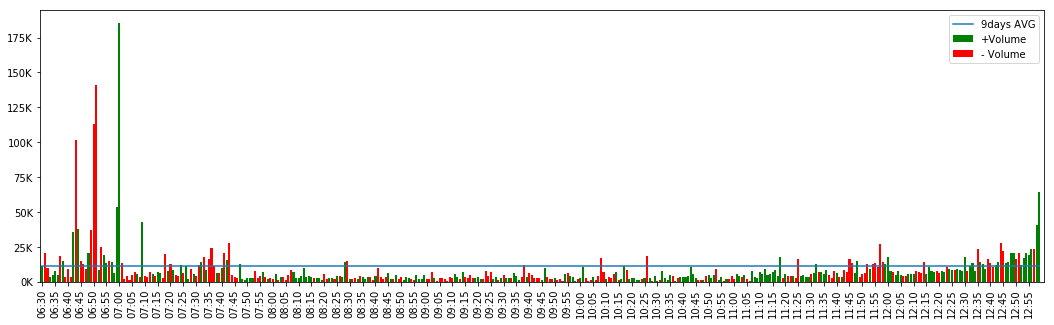

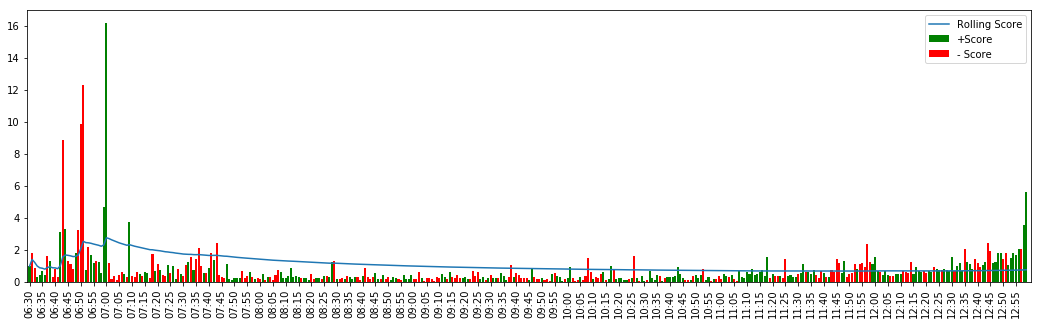

5. BAC 12:59PM: Rolling Score 0.7670548767493612, Current Score 3.0114451594757634


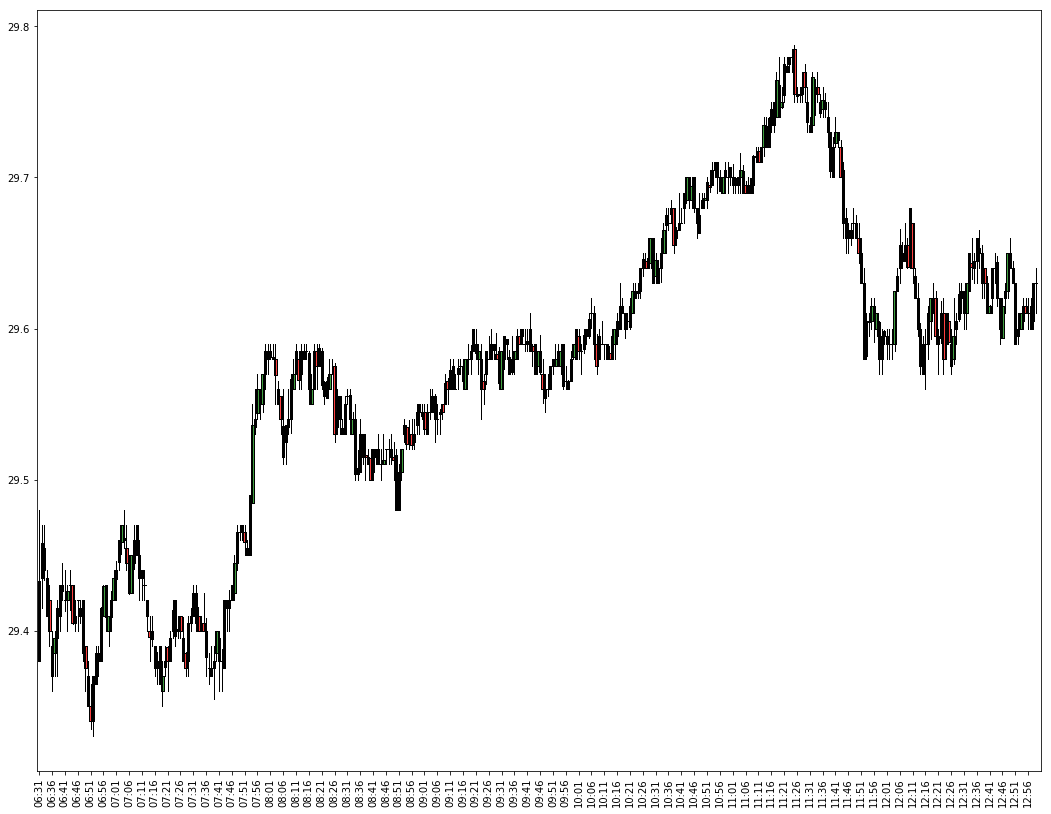

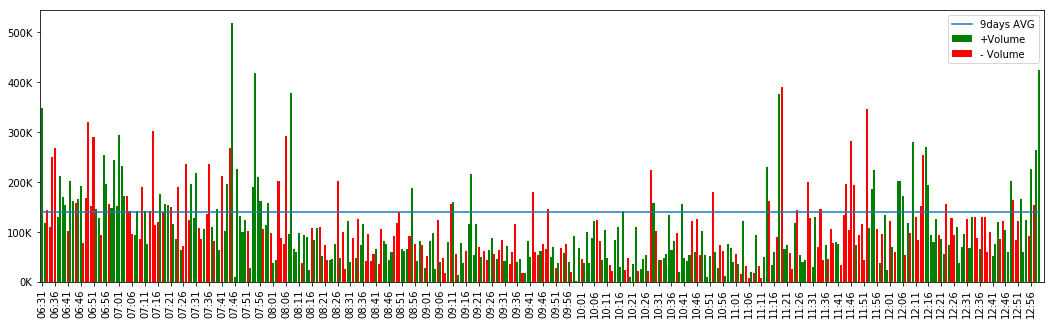

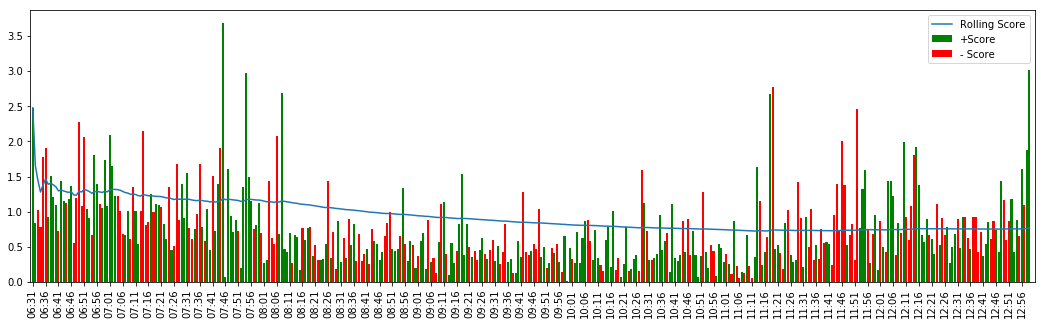

6. GOOG 12:59PM: Rolling Score 0.7158081446198218, Current Score 23.159292100924713


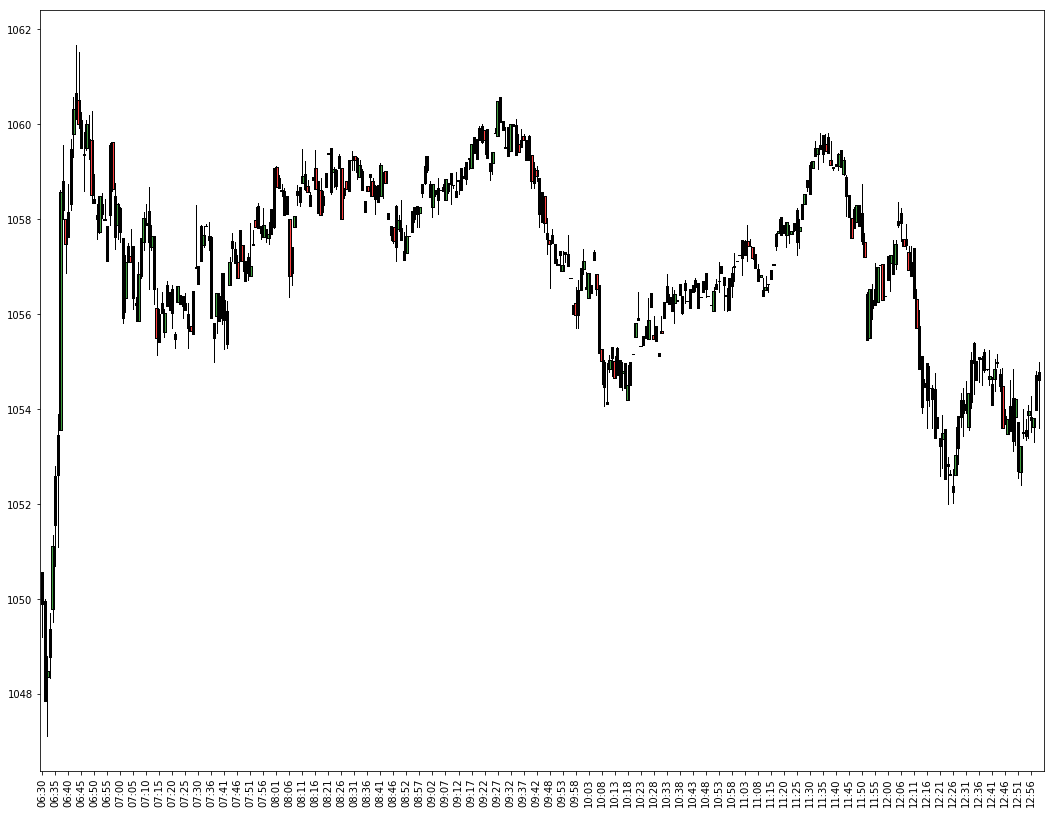

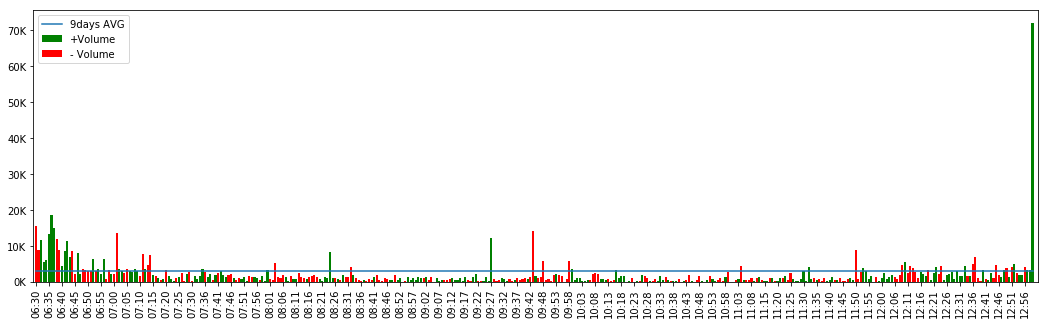

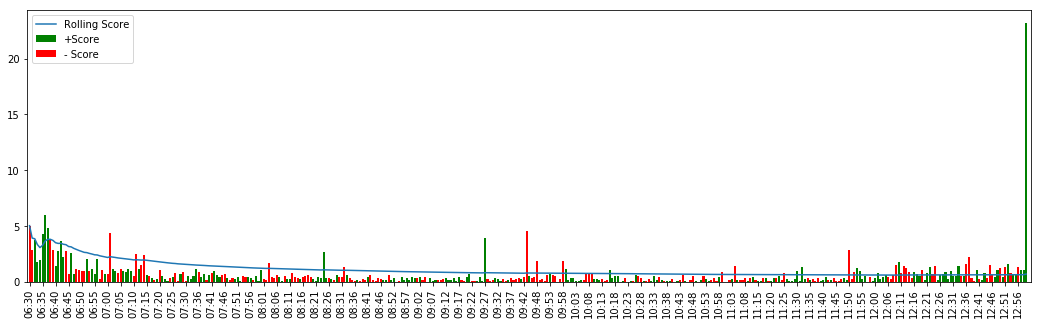

7. PCRX 12:59PM: Rolling Score 0.5067501188846155, Current Score 15.170586694812359


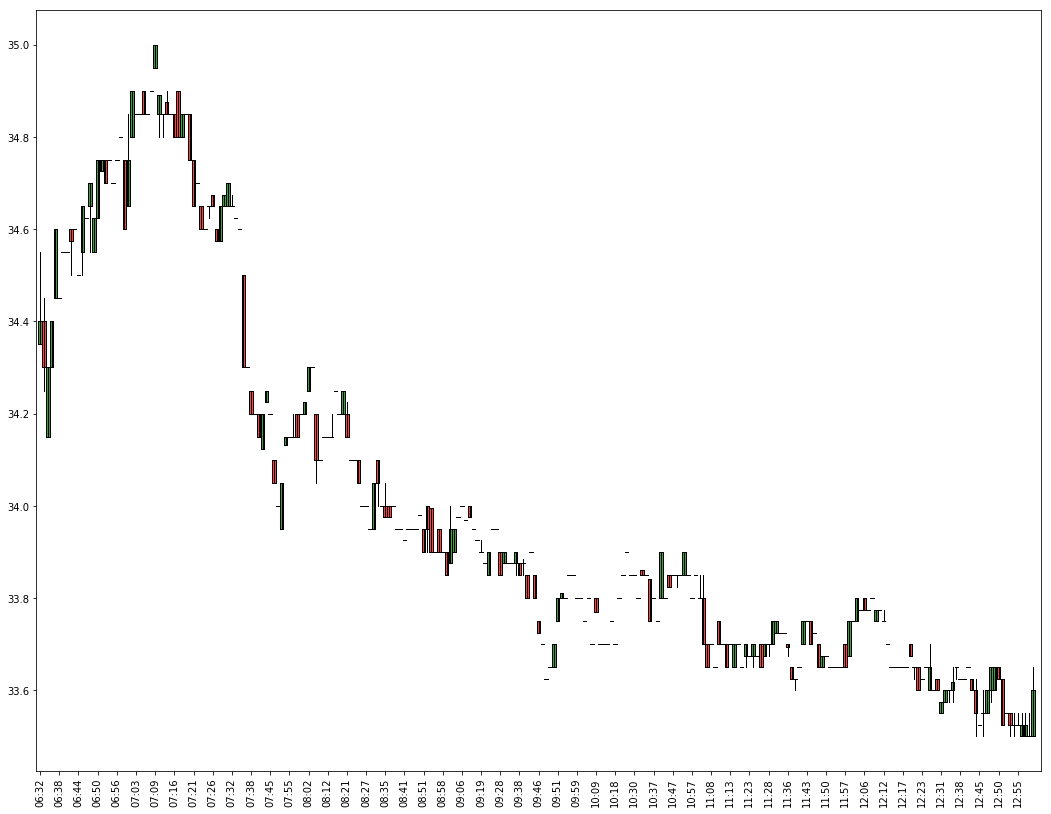

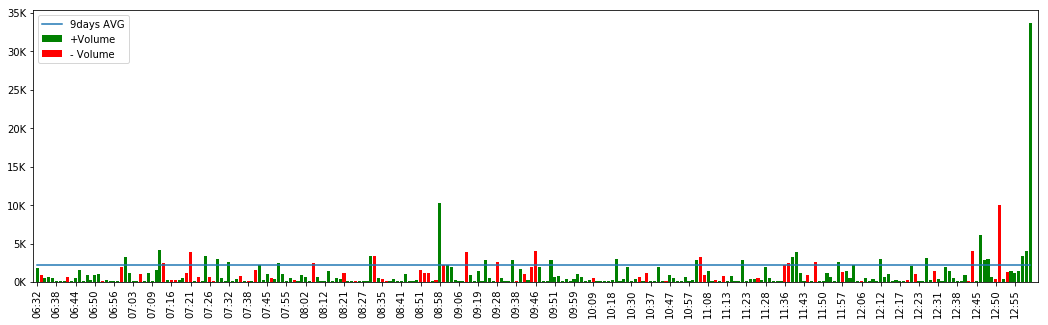

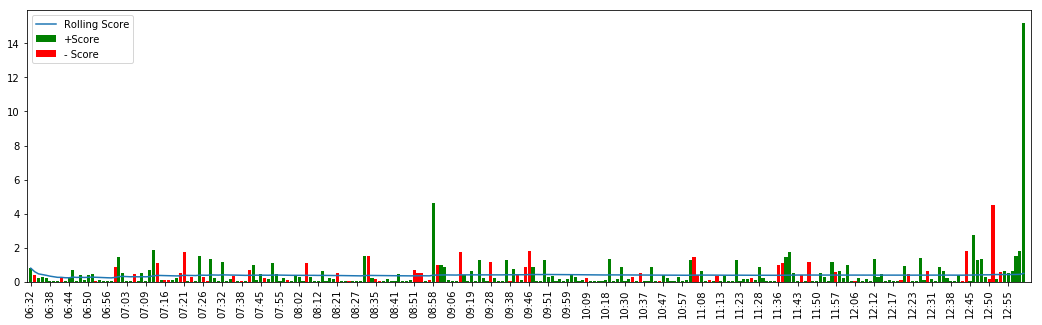

1. GOOG 12:59PM: Rolling Score 0.7158081446198218, Current Score 23.159292100924713


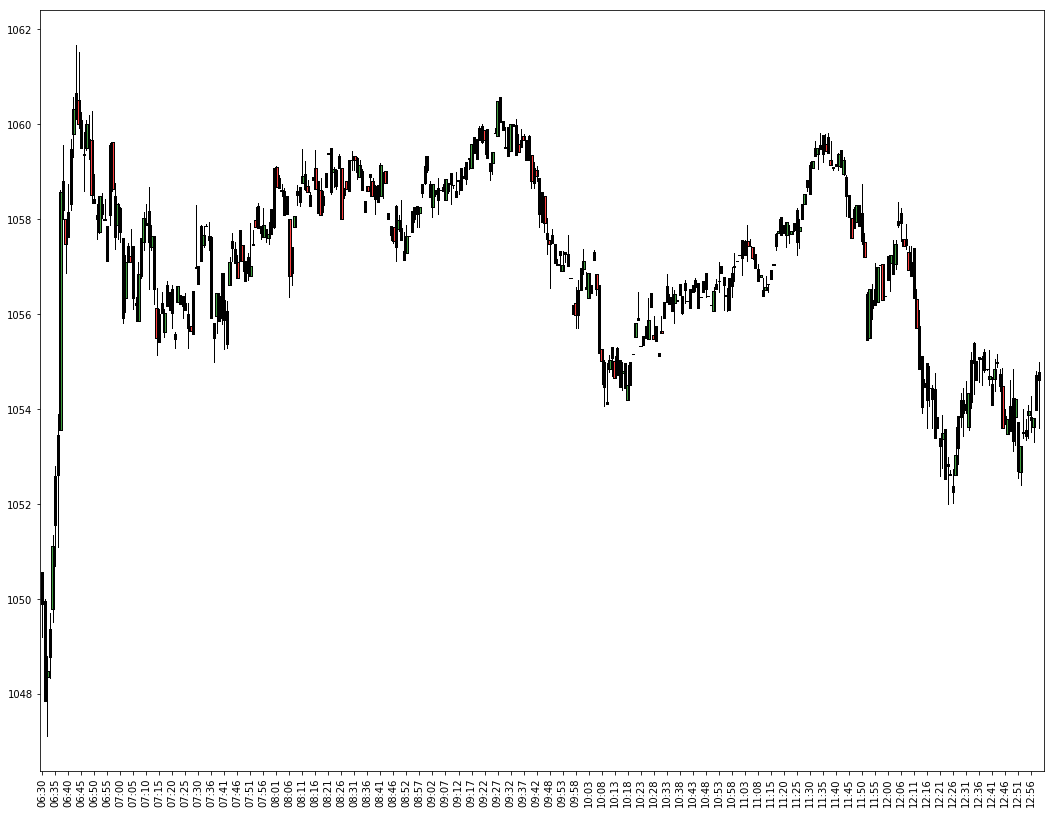

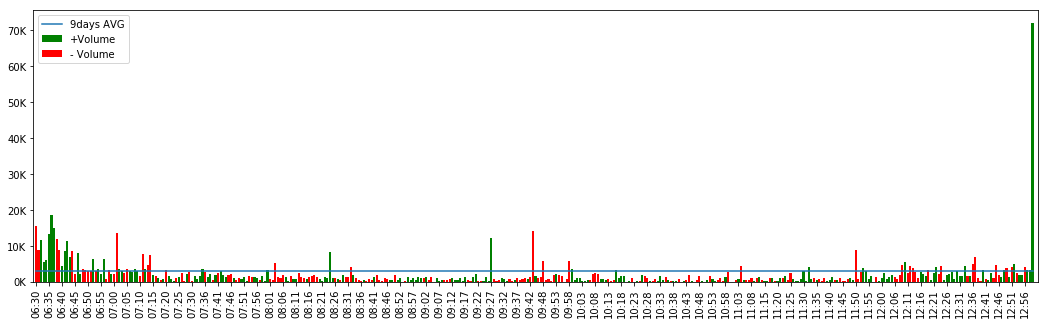

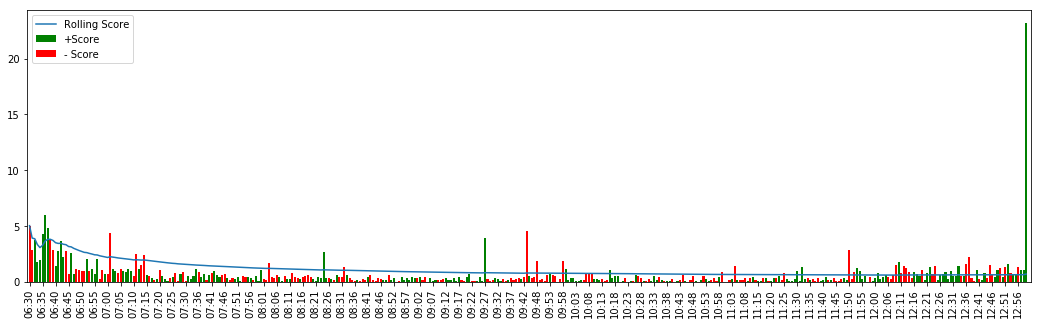

2. AAPL 12:59PM: Rolling Score 1.0540523551582786, Current Score 16.42845780922288


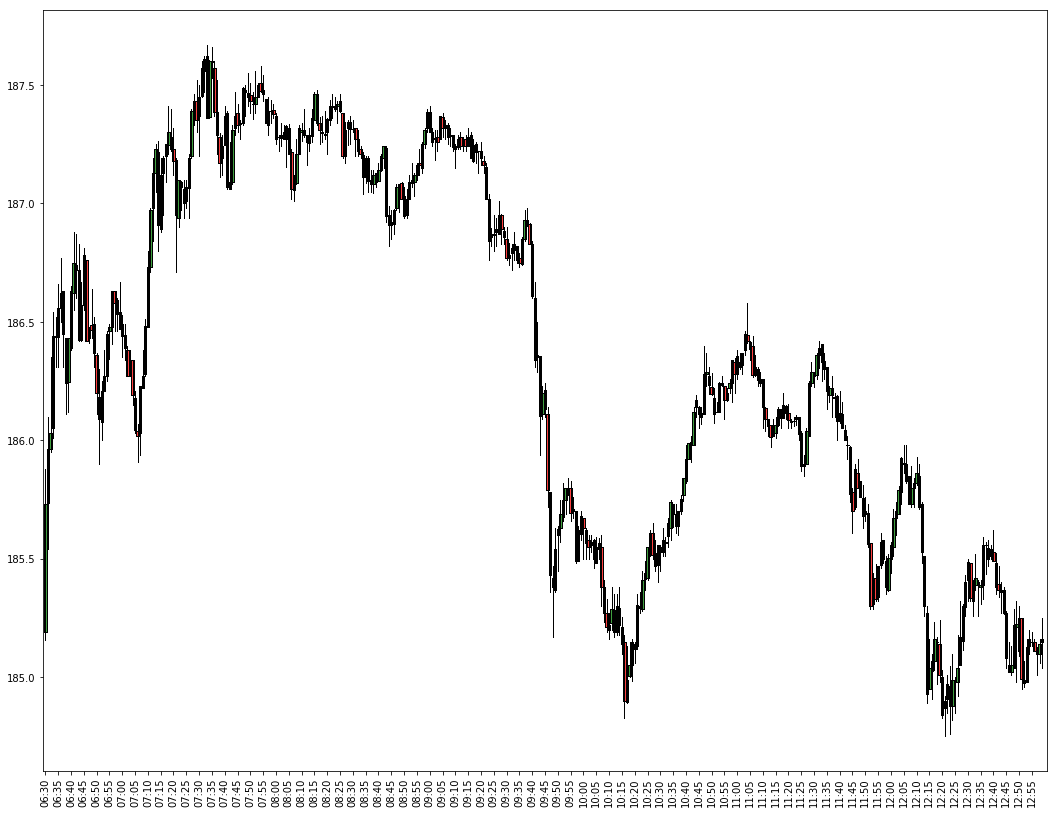

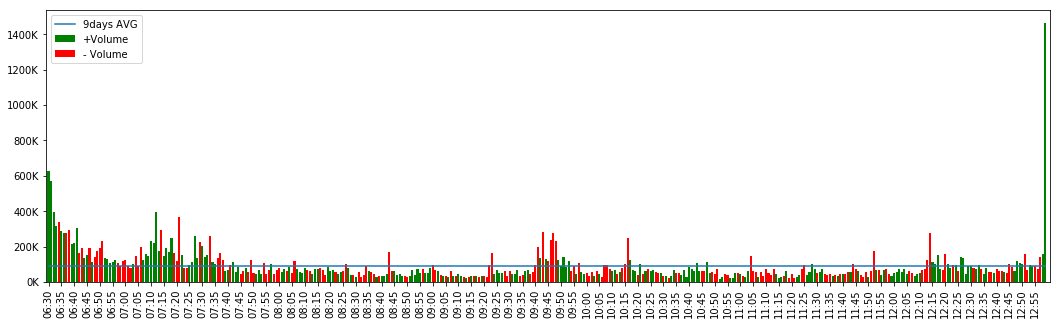

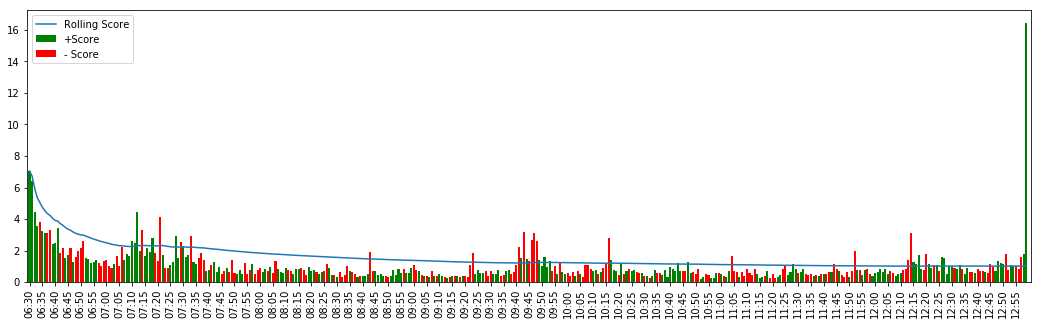

3. PCRX 12:59PM: Rolling Score 0.5067501188846155, Current Score 15.170586694812359


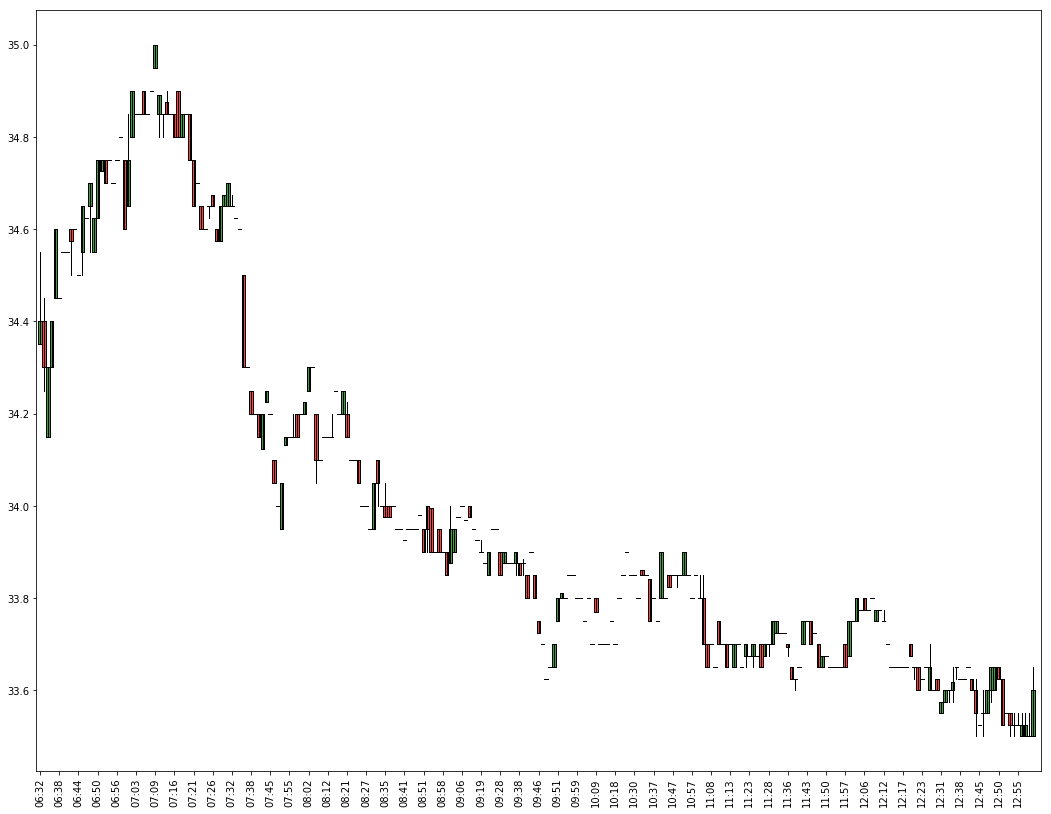

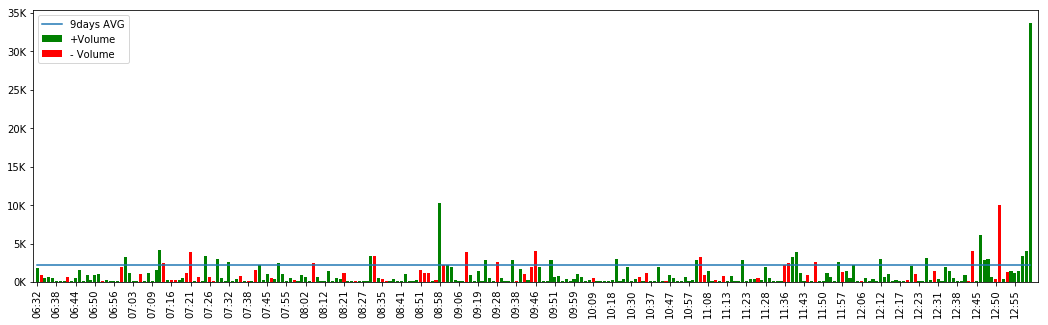

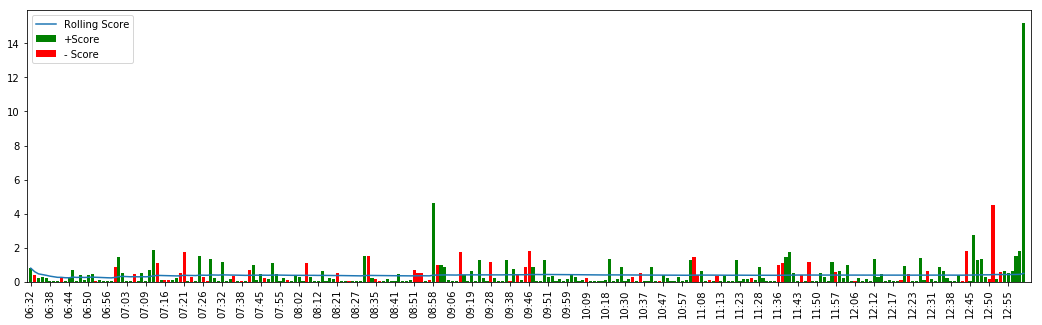

4. WTW 12:59PM: Rolling Score 2.0002240363687593, Current Score 13.484607227255813


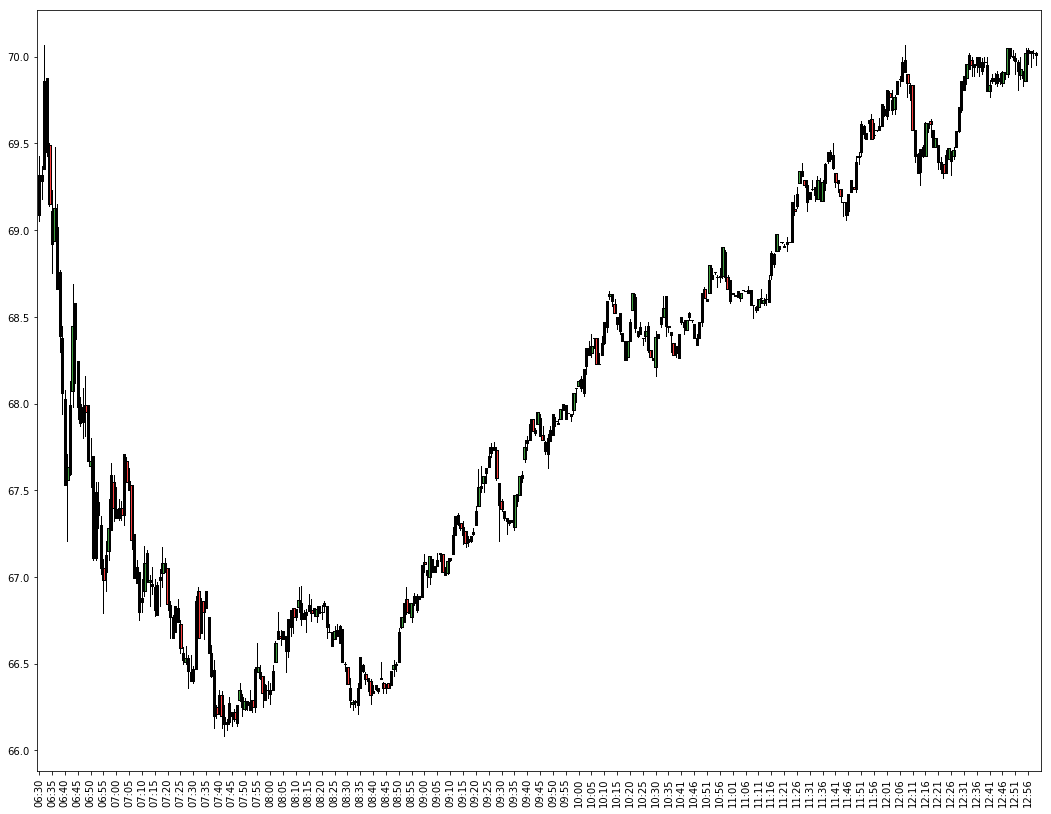

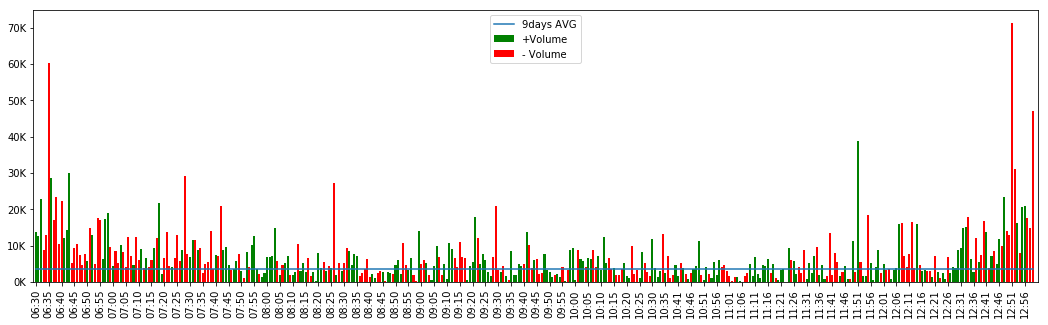

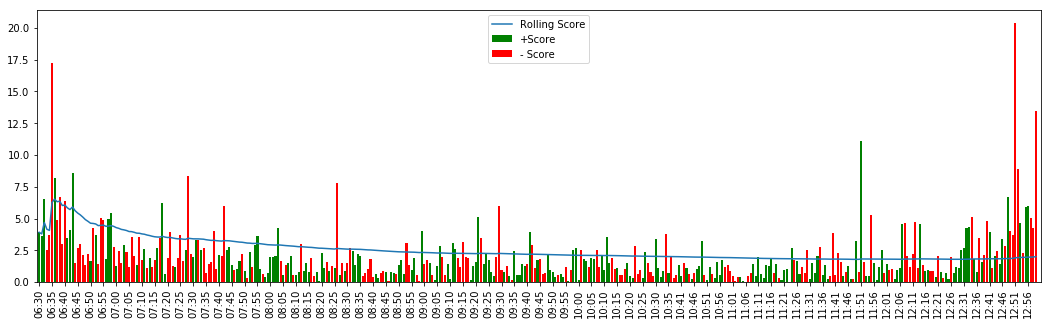

5. CRM 12:59PM: Rolling Score 1.097990466631434, Current Score 8.630135763799997


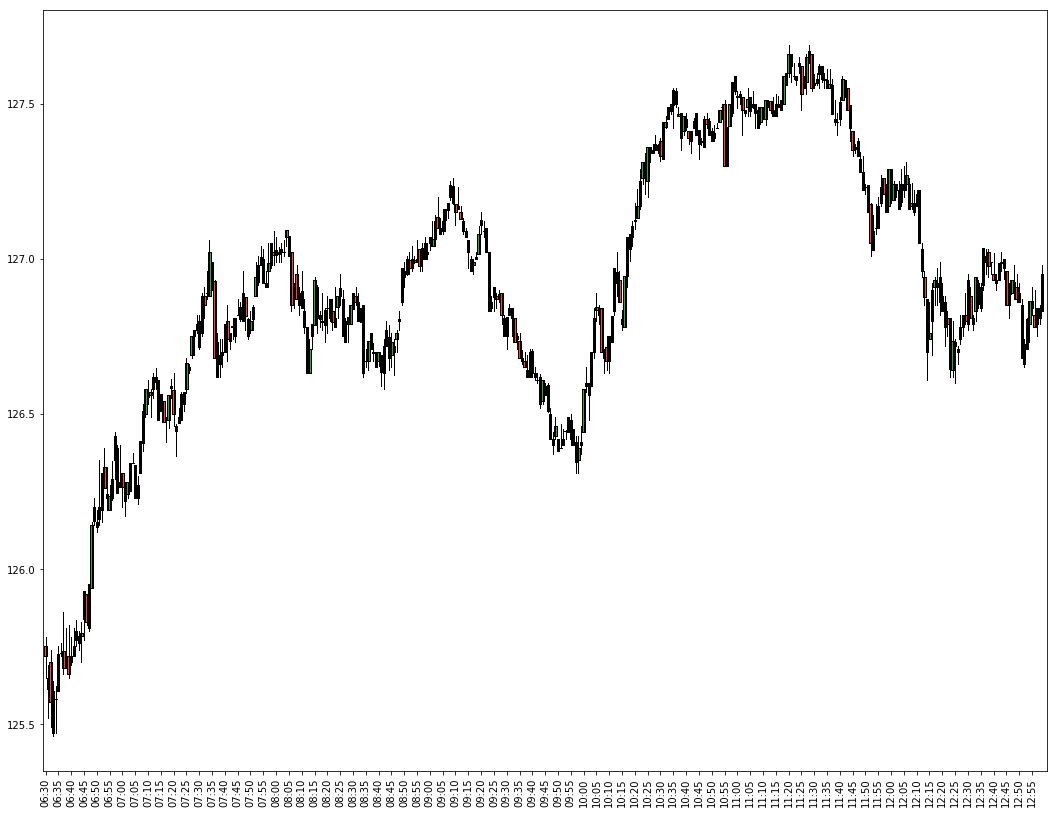

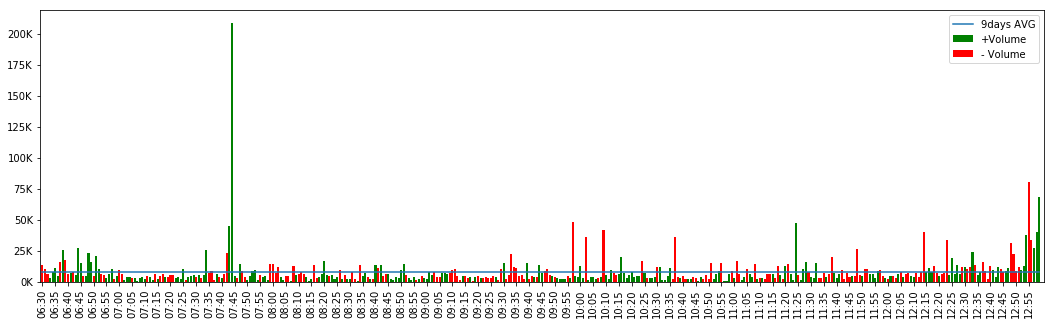

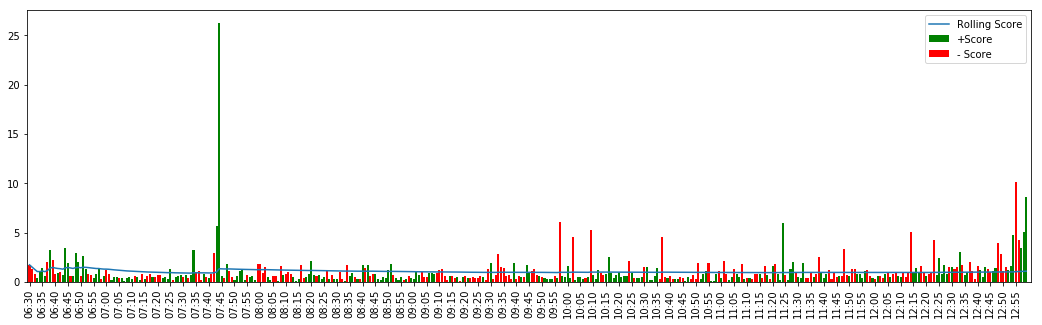

6. LOW 12:59PM: Rolling Score 0.7697600200914454, Current Score 5.5955984316011405


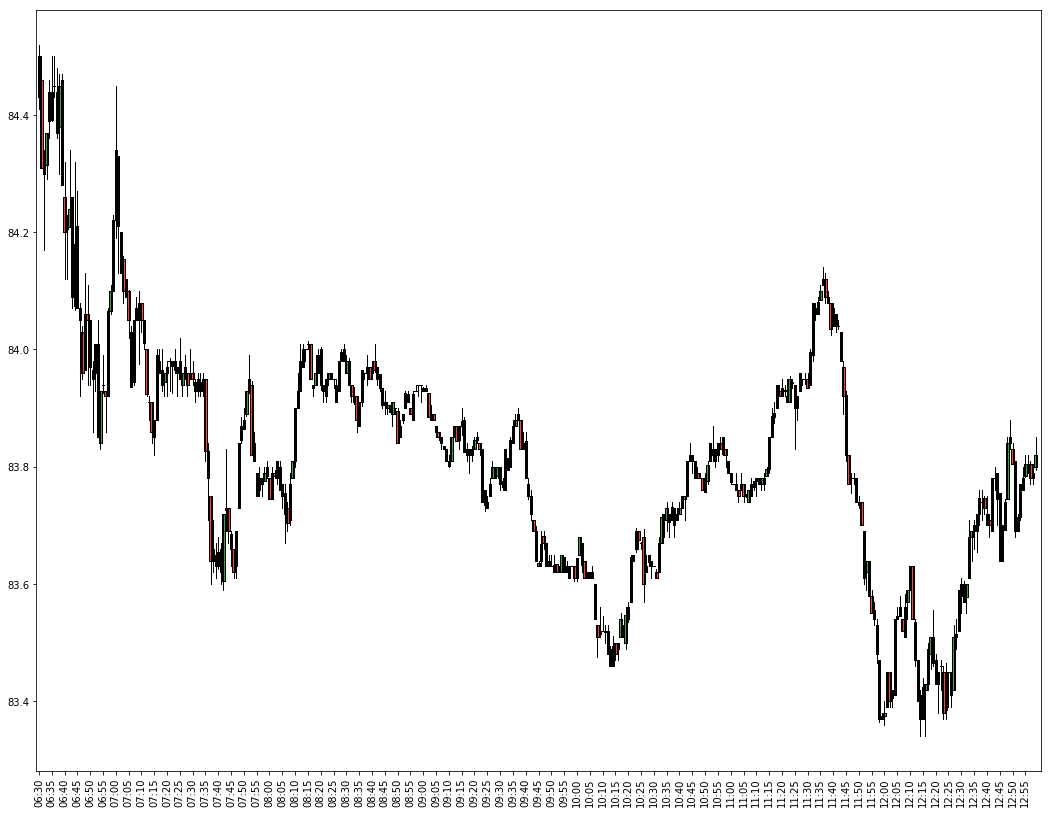

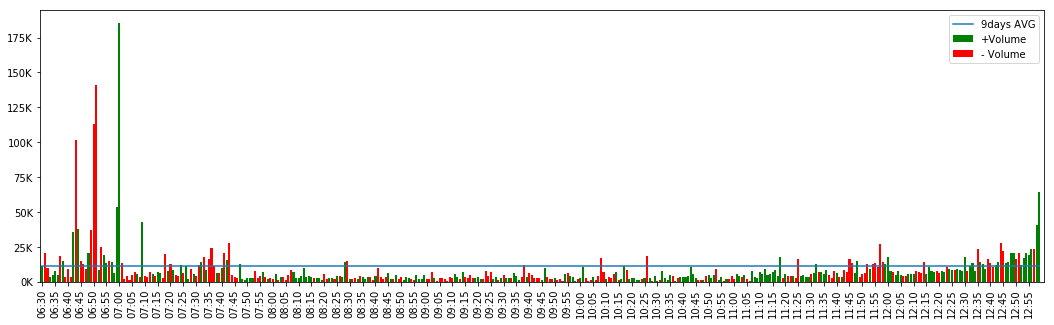

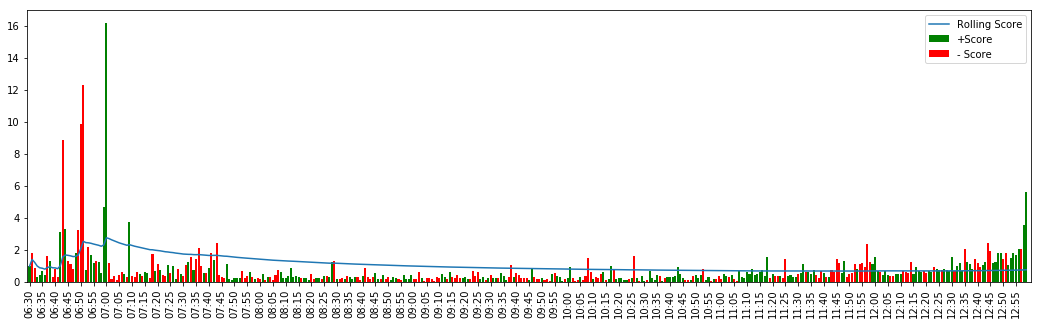

7. BAC 12:59PM: Rolling Score 0.7670548767493612, Current Score 3.0114451594757634


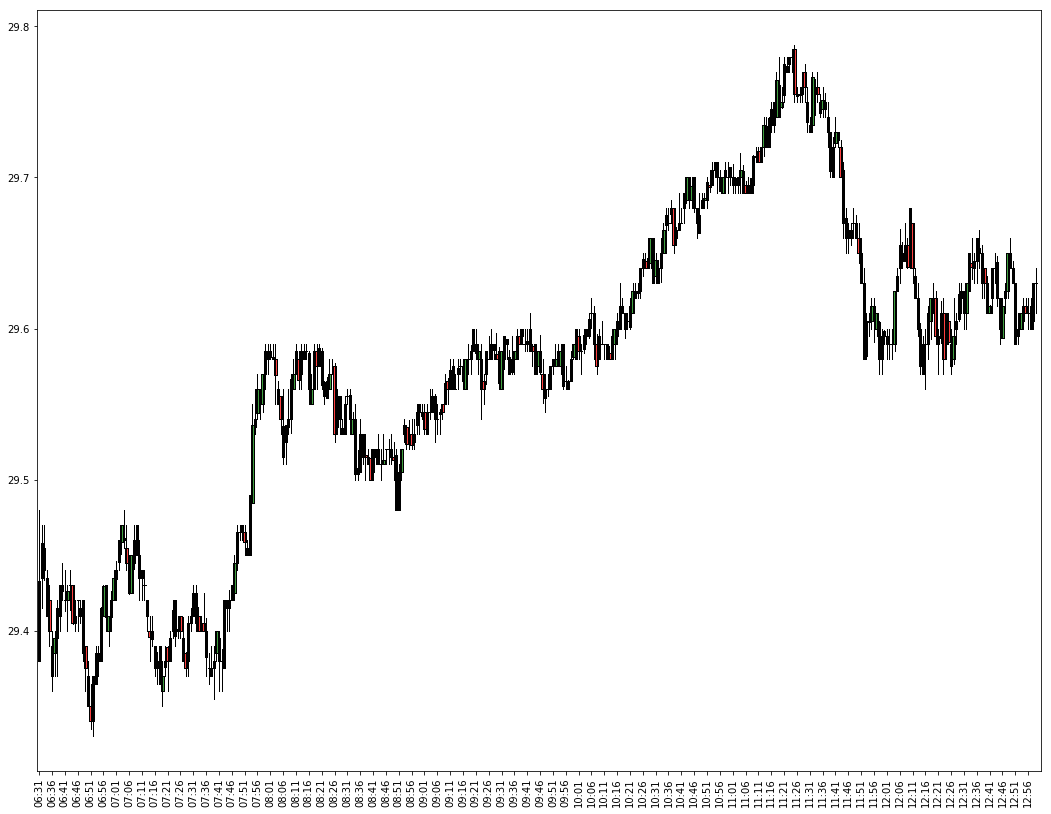

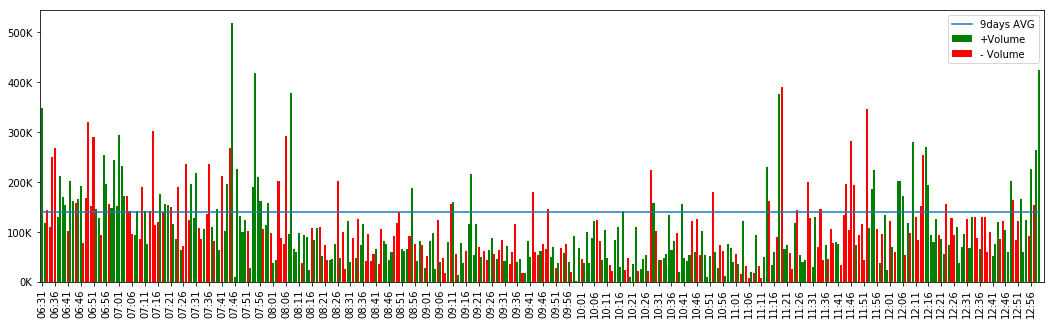

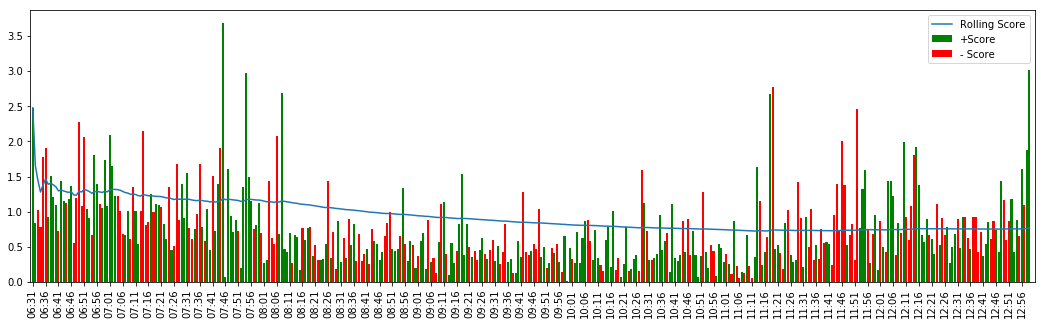

last update 2018-05-07 09:00:00-07:53
prev update None
update time 14:08:11.156040


KeyboardInterrupt: 

In [8]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')
stocks = get_stocks()


def display_list_items(top_df, all_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol])

last_time = None

while True:    
    now = datetime.now(tz=LOCAL_TZ)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
            
        df = get_data_parallel(stocks)
        
        if df is not None:
            clear_output()
            last_minute_data = df.groupby('symbol').last().reset_index()
            
            display(HTML("<h3>Rolling Score List</h3>"))           
            top_volimes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)
            
            display(HTML("<h3>Current Score List</h3>"))
            top_volimes = last_minute_data.sort_values(by='current_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)                
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=LOCAL_TZ) - now)
        last_time = now        
    else:       
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)